In [3]:
import pandas as pd

df = pd.read_csv("C:/Users/HARSH/Downloads/houseing.csv")
print(df)


        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

In [5]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [7]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [8]:
missing_values = df.isnull() .sum() 
print (missing_values) 

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [9]:
duplicates_rows=df.duplicated().sum()
print(f"no of duplicate rows:{duplicates_rows}")

no of duplicate rows:0


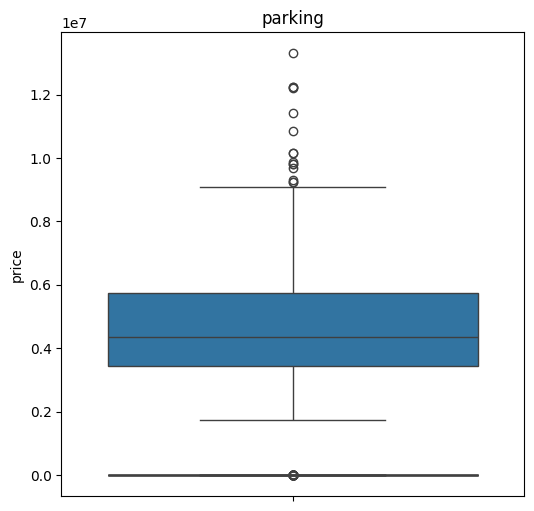

In [11]:
import matplotlib.pyplot as plt

import seaborn as sns

num_cols= ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

plt.figure(figsize=(15,10))

for i, col in enumerate (num_cols, 1):

    plt.subplot(2,3,1)

    sns.boxplot(y=df[col])

    plt.title(col)

plt.tight_layout()

plt.show()

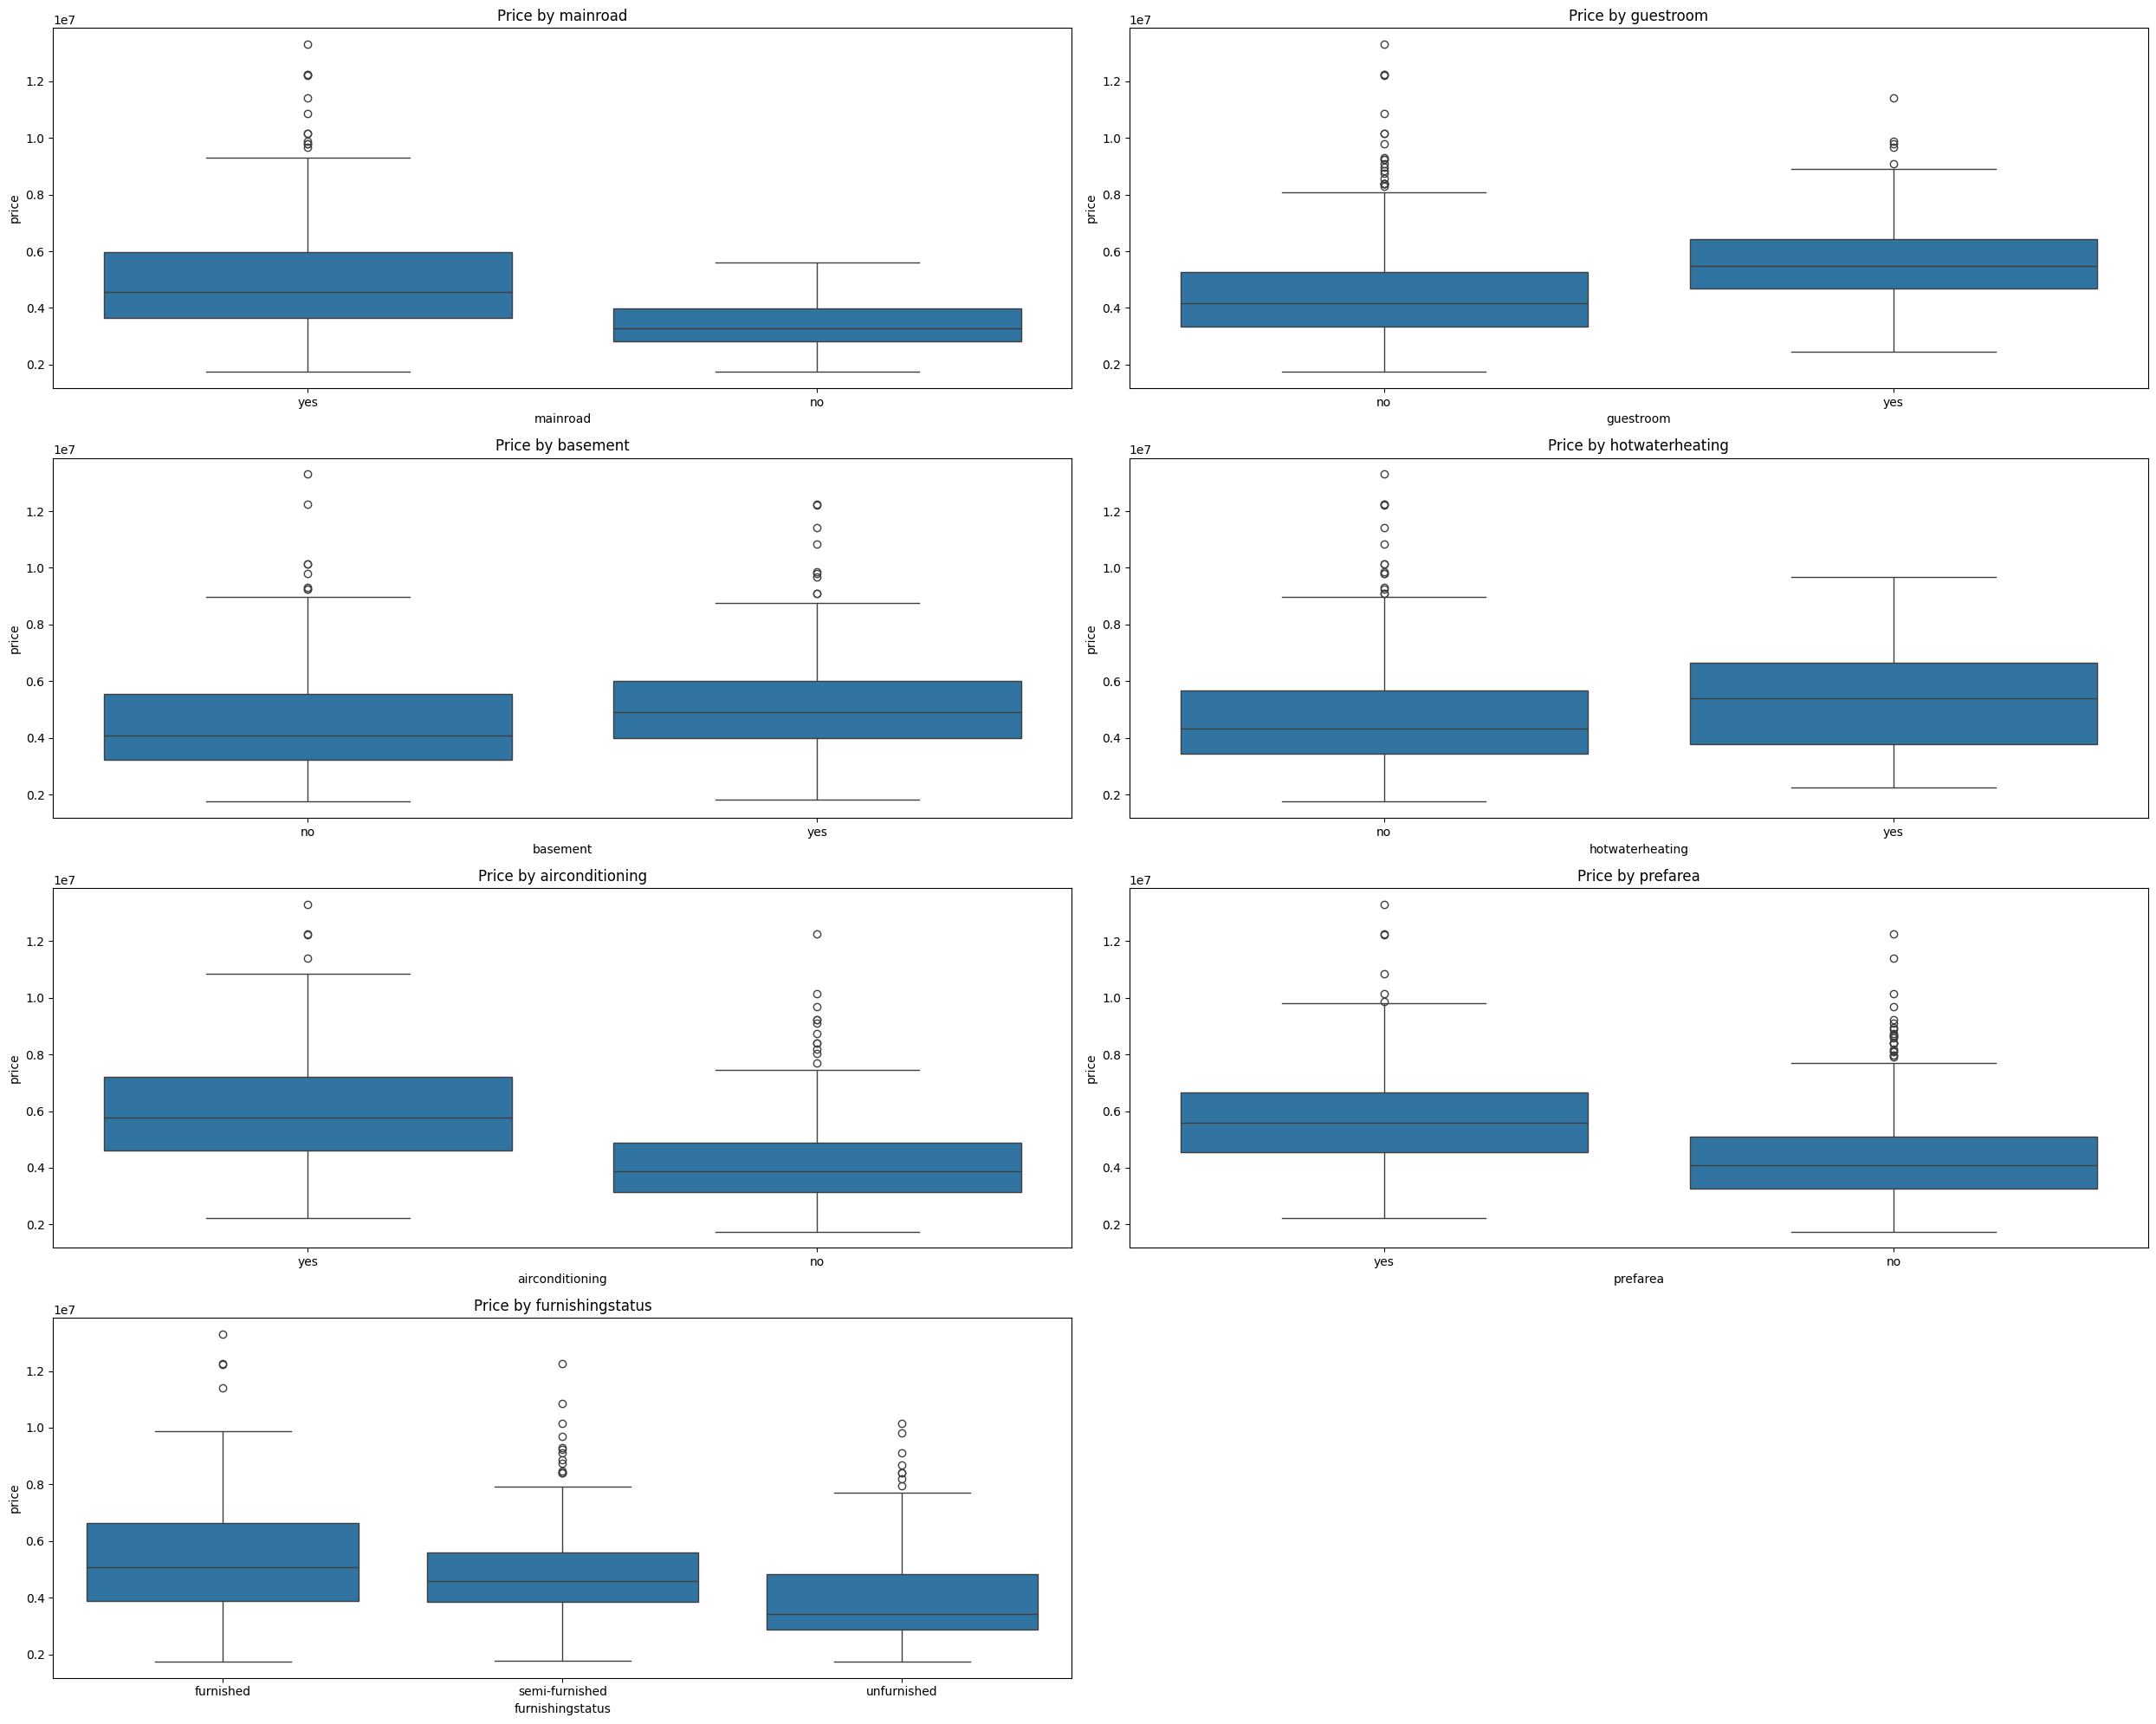

In [12]:

cat_cols = ['mainroad', 'guestroom', 'basement', 
            'hotwaterheating', 'airconditioning', 
            'prefarea', 'furnishingstatus']
plt.figure(figsize=(25, 20))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(x=df[col], y=df['price'])
    plt.title(f'Price by {col}')

plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
df = pd.read_csv("C:/Users/HARSH/Downloads/houseing.csv")
binary_cols = ['mainroad', 'guestroom', 'basement',
               'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))
df = pd.get_dummies(df, columns=['furnishingstatus'], prefix='furnish', drop_first=True)
print(df.head())


      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnish_semi-furnished  furnish_unfurnished  
0                   False                False  
1                   False                False  
2          

In [15]:
import numpy as np
X_num = df[['area', 'bedrooms', 'bathrooms', 'stories', 'parking']].values
mean = np.mean(X_num, axis=0)
std = np.std(X_num, axis=0)
X_standardized = (X_num - mean) / std
print("Standardized features:\n", X_standardized[:5])


Standardized features:
 [[ 1.04672629  1.40341936  1.42181174  1.37821692  1.51769249]
 [ 1.75700953  1.40341936  5.40580863  2.53202371  2.67940935]
 [ 2.21823241  0.04727831  1.42181174  0.22441013  1.51769249]
 [ 1.08362412  1.40341936  1.42181174  0.22441013  2.67940935]
 [ 1.04672629  1.40341936 -0.57018671  0.22441013  1.51769249]]
